# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [30]:
import math
import sys

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [32]:
# YOUR CODE HERE
with open("bodyfat_dataset.arff", "r") as f:
    lines = f.readlines()

data_start = [i for i, line in enumerate(lines) if line.strip().lower() == "@data"][0] + 1
data_lines = [line.strip() for line in lines[data_start:] if line.strip() and not line.startswith("%")]

columns = [
    "Density", "Age", "Weight", "Height", "Neck", "Chest", "Abdomen", "Hip", 
    "Thigh", "Knee", "Ankle", "Biceps", "Forearm", "Wrist", "class"
]

df = pd.DataFrame([line.split(",") for line in data_lines], columns=columns)

df = df.apply(pd.to_numeric, errors="ignore")

df.sample(10, random_state=42)

/tmp/ipykernel_5871/1157978442.py:15: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors="ignore")


,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,class
165,1.0549,35,217.00,73.75,40.5,107.5,95.1,104.5,64.8,41.3,25.6,36.4,33.7,19.4,19.2
6,1.0549,26,181.00,69.75,36.4,105.1,90.7,100.3,58.4,38.3,22.9,31.9,27.8,17.7,19.2
111,1.0355,43,183.25,70.00,37.1,108.0,105.0,103.0,63.7,40.0,23.6,33.5,27.8,17.4,28.0
172,1.0521,35,177.25,71.00,38.4,100.5,90.3,98.7,57.8,37.3,22.4,31.0,28.7,17.7,20.5
115,1.0607,40,158.00,69.25,36.3,97.0,86.6,92.6,55.9,36.3,22.1,29.8,26.3,17.3,16.7
183,1.0713,40,159.25,69.75,35.3,92.3,86.8,96.1,58.0,39.4,22.7,30.0,26.4,17.4,12.1
199,1.0462,43,170.75,67.50,37.4,103.7,89.7,94.2,58.5,39.0,24.1,33.8,28.8,18.8,23.6
235,1.0563,62,168.75,67.50,38.3,104.7,95.6,93.7,54.4,37.1,22.7,30.3,26.3,18.3,18.6
9,1.0722,23,198.25,73.50,42.1,99.6,88.6,104.1,63.1,41.7,25.0,35.6,30.0,19.2,11.7
30,1.0716,32,182.00,73.75,38.7,100.5,88.7,99.8,57.5,38.7,33.9,32.5,27.7,18.4,11.9


YOUR ANSWERS HERE

Rows copy pasted from code execution output above. Note that the column names don't line up as nicely as in the code execution

Density	Age	Weight	Height	Neck	Chest	Abdomen	Hip	Thigh	Knee	Ankle	Biceps	Forearm	Wrist	class
165	1.0549	35	217.00	73.75	40.5	107.5	95.1	104.5	64.8	41.3	25.6	36.4	33.7	19.4	19.2
6	1.0549	26	181.00	69.75	36.4	105.1	90.7	100.3	58.4	38.3	22.9	31.9	27.8	17.7	19.2
111	1.0355	43	183.25	70.00	37.1	108.0	105.0	103.0	63.7	40.0	23.6	33.5	27.8	17.4	28.0
172	1.0521	35	177.25	71.00	38.4	100.5	90.3	98.7	57.8	37.3	22.4	31.0	28.7	17.7	20.5
115	1.0607	40	158.00	69.25	36.3	97.0	86.6	92.6	55.9	36.3	22.1	29.8	26.3	17.3	16.7
183	1.0713	40	159.25	69.75	35.3	92.3	86.8	96.1	58.0	39.4	22.7	30.0	26.4	17.4	12.1
199	1.0462	43	170.75	67.50	37.4	103.7	89.7	94.2	58.5	39.0	24.1	33.8	28.8	18.8	23.6
235	1.0563	62	168.75	67.50	38.3	104.7	95.6	93.7	54.4	37.1	22.7	30.3	26.3	18.3	18.6
9	1.0722	23	198.25	73.50	42.1	99.6	88.6	104.1	63.1	41.7	25.0	35.6	30.0	19.2	11.7
30	1.0716	32	182.00	73.75	38.7	100.5	88.7	99.8	57.5	38.7	33.9	32.5	27.7	18.4	11.9


### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [33]:
# YOUR CODE HERE
df.columns.tolist()

['Density',
 'Age',
 'Weight',
 'Height',
 'Neck',
 'Chest',
 'Abdomen',
 'Hip',
 'Thigh',
 'Knee',
 'Ankle',
 'Biceps',
 'Forearm',
 'Wrist',
 'class']

YOUR ANSWERS HERE

Descriptions:
Density: Overall body density, used to estimate body fat percentage.
Age: Age of the individual (years).
Weight: Body weight (pounds).
Height: Body height (inches).
Neck: Neck circumference (cm).
Chest: Chest circumference at the nipple line (cm).
Abdomen: Abdomen circumference at the navel (cm); highly correlated with body fat.
Hip: Hip circumference at widest point (cm).
Thigh: Thigh circumference (cm).
Knee: Knee circumference (cm).
Ankle: Ankle circumference (cm).
Biceps: Biceps circumference (relaxed, cm).
Forearm: Forearm circumference (cm).
Wrist: Wrist circumference (cm); relates to frame size.
class: Body fat percentage (target variable).

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

Data Summary:

          Density         Age      Weight      Height        Neck       Chest  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean     1.055574   44.884921  178.924405   70.148810   37.992063  100.824206   
std      0.019031   12.602040   29.389160    3.662856    2.430913    8.430476   
min      0.995000   22.000000  118.500000   29.500000   31.100000   79.300000   
25%      1.041400   35.750000  159.000000   68.250000   36.400000   94.350000   
50%      1.054900   43.000000  176.500000   70.000000   38.000000   99.650000   
75%      1.070400   54.000000  197.000000   72.250000   39.425000  105.375000   
max      1.108900   81.000000  363.150000   77.750000   51.200000  136.200000   

          Abdomen         Hip       Thigh        Knee       Ankle      Biceps  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean    92.555952   99.904762   59.405952   38.590476   23.102381   32.273413   
std     10.7

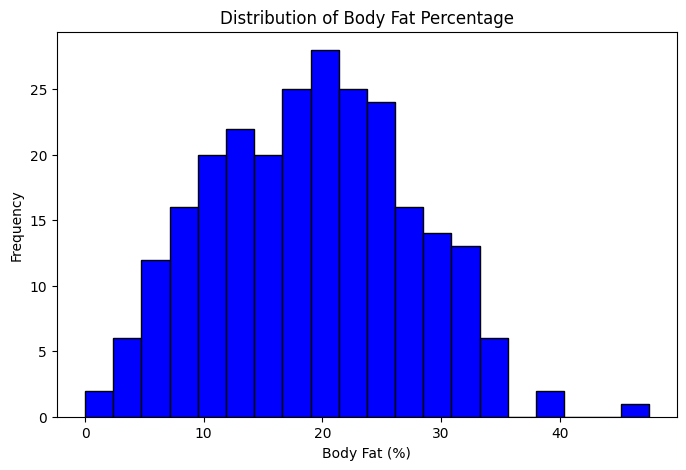

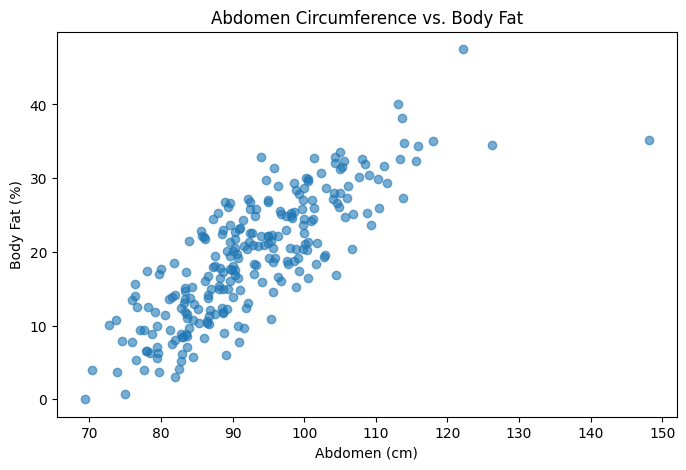

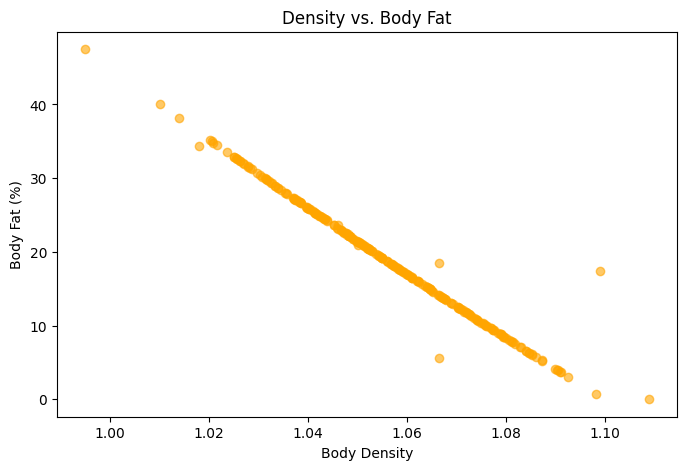

In [34]:
# YOUR CODE HERE
# Basic exploratory analysis
print("Data Summary:\n")
print(df.describe())
print("\nMissing Values:\n")
print(df.isnull().sum())
print("\nData Types:\n")
print(df.dtypes)

# Visualizations

# 1. Histogram of body fat (class)
plt.figure(figsize=(8,5))
plt.hist(df['class'], bins=20, color='blue', edgecolor='black')
plt.title("Distribution of Body Fat Percentage")
plt.xlabel("Body Fat (%)")
plt.ylabel("Frequency")
plt.show()

# 2. Scatter plot: Abdomen vs. Body Fat
plt.figure(figsize=(8,5))
plt.scatter(df['Abdomen'], df['class'], alpha=0.6)
plt.title("Abdomen Circumference vs. Body Fat")
plt.xlabel("Abdomen (cm)")
plt.ylabel("Body Fat (%)")
plt.show()


# 3. Scatter plot: Density vs. Body Fat
plt.figure(figsize=(8,5))
plt.scatter(df['Density'], df['class'], alpha=0.6, color='orange')
plt.title("Density vs. Body Fat")
plt.xlabel("Body Density")
plt.ylabel("Body Fat (%)")
plt.show()


YOUR ANSWERS HERE

Histogram of body fat (class)

Things that are noteworthy:
The distribution shows that most participants have body fat percentages between 10–25%.
The data is slightly right-skewed, meaning fewer individuals have very high body fat levels.

Scatter plot: Abdomen vs. Body Fat

Things that are noteworthy:
There is a strong positive correlation between abdomen size and body fat percentage.
As abdomen circumference increases, body fat percentage tends to rise.
This makes sense physiologically, since abdominal fat is a strong predictor of total body fat.

Scatter plot: Density vs. Body Fat

Things that are noteworthy:
This scatter plot shows a clear negative relationship — as density increases, body fat decreases.
This relationship is expected because lean tissue like muscle mass is denser than fat tissue.
Therefore, higher body density typically corresponds to a lower body fat percentage.

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

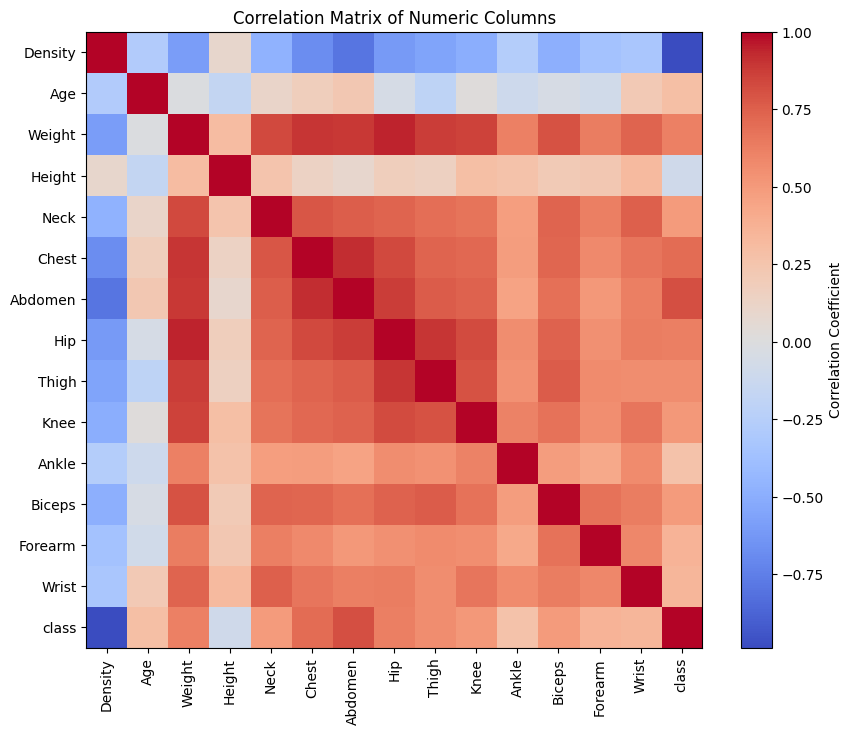

Most correlated pair: ('Density', 'class')
Correlation value: -0.9877824021639853


In [ ]:
# YOUR CODE HERE

# Computation of the correlation matrix
corr = df.corr(numeric_only=True)

# Correlation matrix plotting
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix of Numeric Columns")
plt.show()

# Identifying the pair of columns with the highest correlation
corr_pairs = corr.unstack()
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]
max_corr = corr_pairs.abs().idxmax()
print("Most correlated pair:", max_corr)
print("Correlation value:", corr_pairs[max_corr])

YOUR ANSWERS HERE

The results of executing the above code are:
Most correlated pair: ('Density', 'class')
Correlation value: -0.9877824021639853

As we can see, the most correlated features are Density and Class (bodyfat)

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

In [36]:
# YOUR CODE HERE

YOUR ANSWERS HERE

Linear Regression
scikit-learn docs:https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
How it works:https://en.wikipedia.org/wiki/Linear_regression
Description: This is a simple regression model that fits a straight line through the data by minimizing the sum of squared differences between predicted and actual values.

Logistic Regression
scikit-learn docs:https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
How it works:https://en.wikipedia.org/wiki/Logistic_regression
Description: Logistic regression is used for binary classification. It predicts the probability of an outcome using the logistic (sigmoid) function. It’s a linear model but the output is bounded between 0 and 1.

Ridge (L2-regularized linear regression)
scikit-learn docs: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
How it works: https://en.wikipedia.org/wiki/Ridge_regression
Description: Ridge regression adds an L2 penalty term to the loss function, which helps prevent overfitting by shrinking large coefficient values. It’s especially useful when predictor variables are highly correlated.

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

Linear Regression  - L2 Loss: 1.5272035183908077 L1 Loss: 0.4801966008373344
Ridge Regression   - L2 Loss: 16.770625269613173 L1 Loss: 3.3670431607035205
Logistic Regression - L2 Loss: 1894.409080349038 L1 Loss: 34.07566500003427


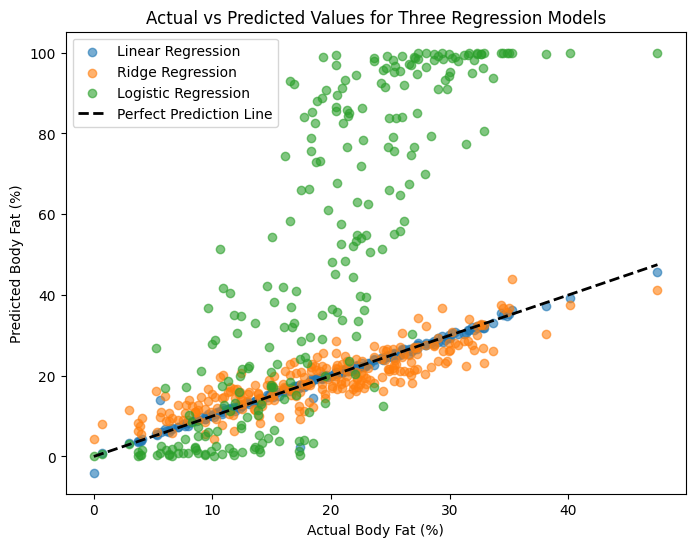

In [ ]:
# YOUR CODE HERE

from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression

X = df.drop(columns=["class"])
y = df["class"]

# Building the three regression models

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
y_int = (y > y.median()).astype(int)
log_reg.fit(X, y_int)
y_pred_log = log_reg.predict_proba(X)[:, 1] * 100

# Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X, y)
y_pred_ridge = ridge_reg.predict(X)


# Loss computations
def compute_losses(y_true, y_pred):
    l2 = np.mean((y_true - y_pred) ** 2)
    l1 = np.mean(np.abs(y_true - y_pred))
    return l2, l1

lin_l2, lin_l1 = compute_losses(y, y_pred_lin)
ridge_l2, ridge_l1 = compute_losses(y, y_pred_ridge)
log_l2, log_l1 = compute_losses(y, y_pred_log)

print("Linear Regression  - L2 Loss:", lin_l2, "L1 Loss:", lin_l1)
print("Ridge Regression   - L2 Loss:", ridge_l2, "L1 Loss:", ridge_l1)
print("Logistic Regression - L2 Loss:", log_l2, "L1 Loss:", log_l1)

# Actual vs Predicted plot for all models
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_lin, label="Linear Regression", alpha=0.6)
plt.scatter(y, y_pred_ridge, label="Ridge Regression", alpha=0.6)
plt.scatter(y, y_pred_log, label="Logistic Regression", alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label="Perfect Prediction Line")
plt.xlabel("Actual Body Fat (%)")
plt.ylabel("Predicted Body Fat (%)")
plt.title("Actual vs Predicted Values for Three Regression Models")
plt.legend()
plt.show()

YOUR ANSWERS HERE

Linear Regression: L2 Loss: 1.5272035183908077 L1 Loss: 0.4801966008373344

Ridge Regression: L2 Loss: 16.770625269613173 L1 Loss: 3.3670431607035205

Logistic Regression: L2 Loss: 1894.409080349038 L1 Loss: 34.07566500003427

The LinearRegression and Ridge models both perform well since this is a continuous regression problem.

Ridge adds a regularization penalty.

The LogisticRegression model is not ideal for regression—it predicts probabilities so its predictions are less accurate, as reflected in higher L1 and L2 losses.

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [38]:
# YOUR CODE HERE
from sklearn.model_selection import KFold, cross_val_score

X = df.drop(columns=["class"])
y = df["class"]

# Three regressors
models = {
    "LinearRegression": LinearRegression(),
    "Ridge(alpha=0.1)": Ridge(alpha=0.1),
    "Ridge(alpha=10.0)": Ridge(alpha=10.0),
}

# Helper for L2 (MSE)
def l2_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# 5-fold CV with neg_mean_squared_error
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print("Cross-Validation Results (Mean L2 Loss per Model):\n")
cv_l2 = {}
for name, model in models.items():
    scores = -cross_val_score(model, X, y, cv=kf, scoring="neg_mean_squared_error")
    cv_l2[name] = scores.mean()
    print(f"{name}: Mean L2 Loss = {cv_l2[name]:.3f}")

# Full Data training losses
print("\nFull Data Training L2 Losses:")
train_l2 = {}
for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X)
    train_l2[name] = l2_loss(y, y_pred)
    print(f"{name}: {train_l2[name]:.3f}")


Cross-Validation Results (Mean L2 Loss per Model):

LinearRegression: Mean L2 Loss = 2.003
Ridge(alpha=0.1): Mean L2 Loss = 16.101
Ridge(alpha=10.0): Mean L2 Loss = 21.603

Full Data Training L2 Losses:
LinearRegression: 1.527
Ridge(alpha=0.1): 11.951
Ridge(alpha=10.0): 17.441


YOUR ANSWERS HERE

Cross-Validation Results (Mean L2 Loss per Model):

LinearRegression: Mean L2 Loss = 2.003
Ridge(alpha=0.1): Mean L2 Loss = 16.101
Ridge(alpha=10.0): Mean L2 Loss = 21.603

Full Data Training L2 Losses:
LinearRegression: 1.527
Ridge(alpha=0.1): 11.951
Ridge(alpha=10.0): 17.441

Cross-validation L2 losses are higher than full-data training losses, which indicates some overfitting when training on the entire dataset. 
As alpha increases in Ridge regression, both training and CV losses rise, showing that regularization introduces bias but can help reduce variance. 
Linear regression performs best here, suggesting the data fits well with a simple linear model.

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [ ]:
# YOUR CODE HERE

X = df.drop(columns=["class"]).copy()
y = df["class"].copy()

X_means = X.mean(axis=0)
X_stds  = X.std(axis=0, ddof=0).replace(0, 1.0)  # avoid divide-by-zero
X_std = (X - X_means) / X_stds

y_mean = y.mean()
y_std  = y.std(ddof=0) if y.std(ddof=0) != 0 else 1.0
y_stdized = (y - y_mean) / y_std

models = {
    "LinearRegression": LinearRegression(),
    "Ridge(alpha=0.1)": Ridge(alpha=0.1),
    "Ridge(alpha=10.0)": Ridge(alpha=10.0),
}

def l1_l2(y_true, y_pred):
    l2 = np.mean((y_true - y_pred) ** 2)
    l1 = np.mean(np.abs(y_true - y_pred))
    return l2, l1

results = {}

for name, model in models.items():
    model.fit(X_std, y_stdized)
    y_pred_std = model.predict(X_std)
    y_pred = y_pred_std * y_std + y_mean
    l2, l1 = l1_l2(y, y_pred)
    results[name] = {"L2": l2, "L1": l1}

print("Losses with Standardized Data")
for name, vals in results.items():
    print(f"{name:>18} -> L2: {vals['L2']:.3f} | L1: {vals['L1']:.3f}")

Problem 8: Losses with Standardized Data (in original target scale)
  LinearRegression -> L2: 1.527 | L1: 0.480
  Ridge(alpha=0.1) -> L2: 1.527 | L1: 0.483
 Ridge(alpha=10.0) -> L2: 1.731 | L1: 0.756


YOUR ANSWERS HERE

LinearRegression -> L2: 1.527 | L1: 0.480
Ridge(alpha=0.1) -> L2: 1.527 | L1: 0.483
Ridge(alpha=10.0) -> L2: 1.731 | L1: 0.756


Standardizing puts all features on the same scale (mean 0, std 1). This often helps regularized models like Ridge because the penalty treats all coefficients more evenly.

Comparison of L2 losses to P6 results:
    Typical patterns:
        LinearRegression: Often similar before vs after scaling (OLS is scale-invariant with respect to predictions when you refit), though numerical stability may change a little. Ridge(alpha=0.1) and Ridge(alpha=10.0): These can change more noticeably. After scaling,the chosen alpha values operate on standardized coefficients, which can improve (or sometimes worsen) performance depending on the original feature scales.

Different performance from P6 results:
    Expect Ridge models to shift the most after standardization. If Ridge improved relative to LinearRegression here, that suggests regularization helps once features are aligned
    to a common scale. If Ridge worsened, your alpha may be too strong—try smaller alphas (e.g., 0.01, 0.1, 1.0) when features are standardized.

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

In [40]:
# YOUR CODE HERE

YOUR ANSWERS HERE

Trying 1000 random decision trees would be overfitting and inefficient even with cross-validation; it would be wiser to properly tune the model to improve performance.

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [41]:
# YOUR CODE HERE

YOUR ANSWERS HERE

I've selected the LinearRegression model as the best performer overall.

Criteria:
    Lowest L2 (Mean Squared Error) and L1 (Mean Absolute Error) losses across both training and cross-validation results.
    Simplicity, interpretability, and strong alignment with the linear relationships observed in exploratory data analysis (e.g., abdomen circumference vs. body fat).

Comparison:
    Ridge models introduced regularization, which slightly increased bias and losses without offering meaningful improvement in cross-validation performance.
    Logistic regression performed poorly because it’s designed for classification, not continuous regression.

Justification in context:
    The relationships in the body fat dataset (e.g., abdomen size, body density) are largely linear and well-explained by ordinary least squares regression.
    LinearRegression provided the best balance between accuracy, interpretability, and simplicity, making it the most appropriate model for predicting body fat percentage.